**Utilizando o Arduino em Ciência de Dados**

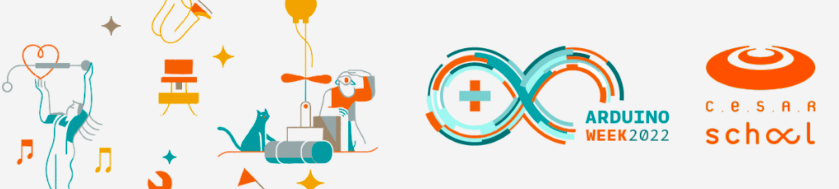


Olá, bem-vindo ao workshop de como utilizar o Arduino em ciência de dados. Neste workshop vamos aprender:

1. Manipular dados com as bibliotecas 

*   Pandas
*   Numpy


2. Como importar os dados provenientes de sensores do Arduino a partir de arquivos .CSV

3. Introdução à Análise Exploratória dos Dados

4. Construindo meu primeiro Modelo a partir de dados capturados 



## 1. Bibliotecas para data science

### Numpy

Vamos observar na prática o quanto o Numpy torna mais eficiente alguns cálculos matemáticos....

In [1]:
import time

start_time = time.time()
a = range(105000)
b = range(105000)
c = []

for i in range(len(a)):
  c.append(a[i] + b[i])
elapsed_time = time.time() - start_time
# Mostrar o resultado temporal deste cálculo matemático
print(elapsed_time)

0.10993695259094238


In [2]:
import numpy as np

start_time = time.time()
a = np.arange(105000)
b = np.arange(105000)
c = []

c = a + b

elapsed_time = time.time() - start_time
# Mostrar o resultado
print(elapsed_time)

0.006888866424560547


### Pandas

In [3]:
import pandas as pd

**Série**

In [4]:
t_ts = pd.Series([23.3, 24.1, 32.1, 25.0, 31.2])

In [5]:
t_ts

0    23.3
1    24.1
2    32.1
3    25.0
4    31.2
dtype: float64

In [6]:
t_ts.values

array([23.3, 24.1, 32.1, 25. , 31.2])

In [7]:
t_ts.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
t_ts = pd.Series([23.3, 24.1, 32.1, 25.0, 31.2], index=['Seg', 'Ter', 'Qua', 'Qui', 'Sex'])

In [9]:
t_ts

Seg    23.3
Ter    24.1
Qua    32.1
Qui    25.0
Sex    31.2
dtype: float64

In [10]:
print(f"Imprime a média da série: {t_ts.mean()}")


Imprime a média da série: 27.139999999999997


**DataFrame**

In [11]:
t_df = pd.DataFrame({'Temp': [23.3, 24.1, 32.1, 25.0, 31.2], 
                     'Dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
                     'Agua': [1, 1, 0, 1, 0]
                     })

In [12]:
t_df

,Temp,Dia,Agua
0,23.3,Seg,1
1,24.1,Ter,1
2,32.1,Qua,0
3,25.0,Qui,1
4,31.2,Sex,0


In [13]:
t_df.dtypes

Temp    float64
Dia      object
Agua      int64
dtype: object

In [14]:
t_df.columns

Index(['Temp', 'Dia', 'Agua'], dtype='object')

In [15]:
t_df['Temp']

0    23.3
1    24.1
2    32.1
3    25.0
4    31.2
Name: Temp, dtype: float64

In [16]:
t_df.describe()

,Temp,Agua
count,5.000000,5.000000
mean,27.140000,0.600000
std,4.172889,0.547723
min,23.300000,0.000000
25%,24.100000,0.000000
50%,25.000000,1.000000
75%,31.200000,1.000000
max,32.100000,1.000000


### Matplotlib e Seaborn

Para que é utilizada a visualização de dados?

- Identificação de relações e padrões

- Identificar últimas tendências

- Contar uma _história_ 

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

## 2. Importando dados de arquivos csv

A lib pandas nos oferece uma série de métodos para leitura de dados! 

Alguns dos mais importantes são: 

- **read_csv**: para ler arquivos .csv
- **read_xlsx**: para ler arquivos Excel .xlsx

In [19]:
car = pd.read_csv('car_trip.csv')

In [20]:
car.head(5)

,ENGINE_RUN_TINE (),ENGINE_RPM (),VEHICLE_SPEED (),THROTTLE (),ENGINE_LOAD (),COOLANT_TEMPERATURE (),LONG_TERM_FUEL_TRIM_BANK_1 (),SHORT_TERM_FUEL_TRIM_BANK_1 (),INTAKE_MANIFOLD_PRESSURE (),FUEL_TANK (),...,INTAKE_AIR_TEMP (),TIMING_ADVANCE (),CATALYST_TEMPERATURE_BANK1_SENSOR1 (),CATALYST_TEMPERATURE_BANK1_SENSOR2 (),CONTROL_MODULE_VOLTAGE (),COMMANDED_EVAPORATIVE_PURGE (),TIME_RUN_WITH_MIL_ON (),TIME_SINCE_TROUBLE_CODES_CLEARED (),DISTANCE_TRAVELED_WITH_MIL_ON (),Unnamed: 26
0,0.0,0.0,0.0,17.647058,0.0,56.0,-3.90625,0.0,101.0,67.058823,...,37.0,5.0,506.5,352.100006,12.480,0.0,0.0,1383.0,0.0,47.0
1,0.0,0.0,0.0,17.647058,0.0,56.0,-3.90625,0.0,101.0,67.058823,...,37.0,5.0,506.5,352.100006,12.480,0.0,0.0,1383.0,0.0,47.0
2,0.0,0.0,0.0,17.647058,0.0,56.0,-3.90625,0.0,92.0,67.058823,...,37.0,5.0,506.5,352.100006,12.480,0.0,0.0,1383.0,0.0,47.0
3,0.0,0.0,0.0,18.039215,0.0,56.0,-3.90625,0.0,92.0,67.058823,...,37.0,5.0,506.5,352.100006,12.480,0.0,0.0,1383.0,0.0,47.0
4,0.0,0.0,0.0,18.039215,0.0,56.0,-3.90625,0.0,92.0,67.058823,...,37.0,5.0,506.5,352.100006,12.011,0.0,0.0,1383.0,0.0,47.0


In [21]:
car = car.drop_duplicates()

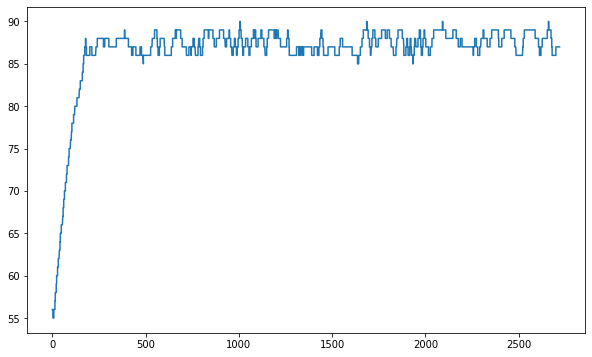

In [22]:
fig = plt.figure(figsize=(10,6))
plt.plot(car['ENGINE_RUN_TINE ()'], car['COOLANT_TEMPERATURE ()'])

In [23]:
car.dtypes

ENGINE_RUN_TINE ()                       float64
ENGINE_RPM ()                            float64
VEHICLE_SPEED ()                         float64
THROTTLE ()                              float64
ENGINE_LOAD ()                           float64
COOLANT_TEMPERATURE ()                   float64
LONG_TERM_FUEL_TRIM_BANK_1 ()            float64
SHORT_TERM_FUEL_TRIM_BANK_1 ()           float64
INTAKE_MANIFOLD_PRESSURE ()              float64
FUEL_TANK ()                             float64
ABSOLUTE_THROTTLE_B ()                   float64
PEDAL_D ()                               float64
PEDAL_E ()                               float64
COMMANDED_THROTTLE_ACTUATOR ()           float64
FUEL_AIR_COMMANDED_EQUIV_RATIO ()        float64
ABSOLUTE_BAROMETRIC_PRESSURE ()          float64
RELATIVE_THROTTLE_POSITION ()            float64
INTAKE_AIR_TEMP ()                       float64
TIMING_ADVANCE ()                        float64
CATALYST_TEMPERATURE_BANK1_SENSOR1 ()    float64
CATALYST_TEMPERATURE

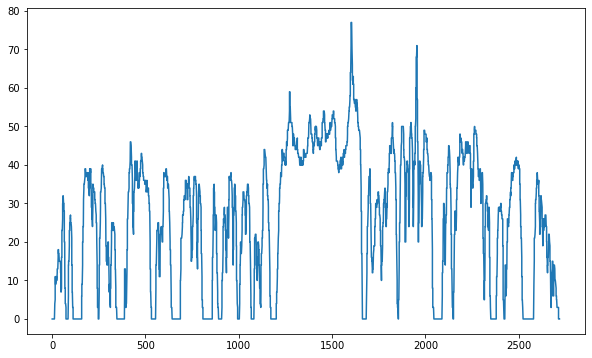

In [24]:
fig = plt.figure(figsize=(10,6))
plt.plot(car['ENGINE_RUN_TINE ()'], car['VEHICLE_SPEED ()'])

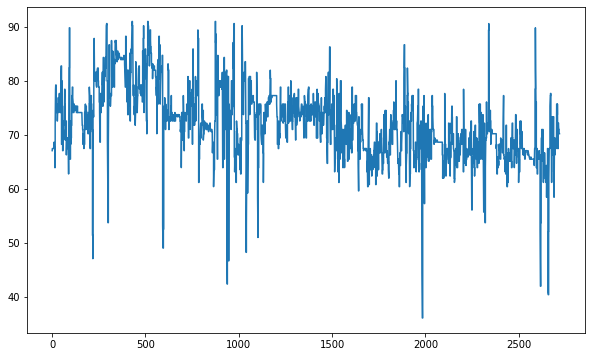

In [25]:
fig = plt.figure(figsize=(10,6))
plt.plot(car['ENGINE_RUN_TINE ()'], car['FUEL_TANK ()'])

## 3. Introdução à Análise Exploratória dos Dados

*Será que a velocidade de condução do veículo é uma distribuição normal?*

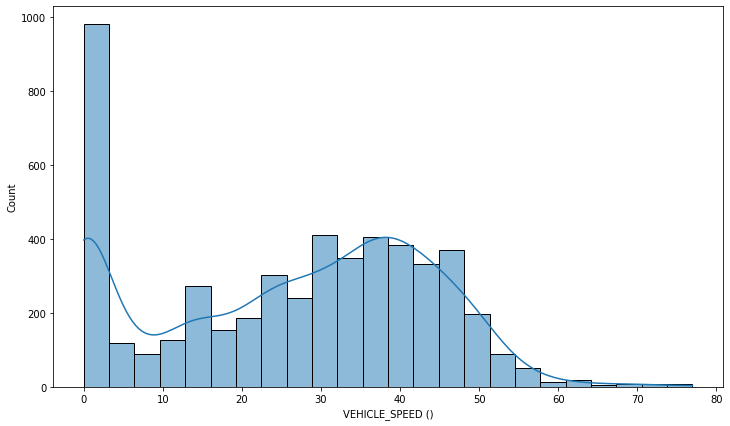

In [26]:
plt.figure(figsize=(12, 7))
sns.histplot(data=car, x="VEHICLE_SPEED ()", kde=True)

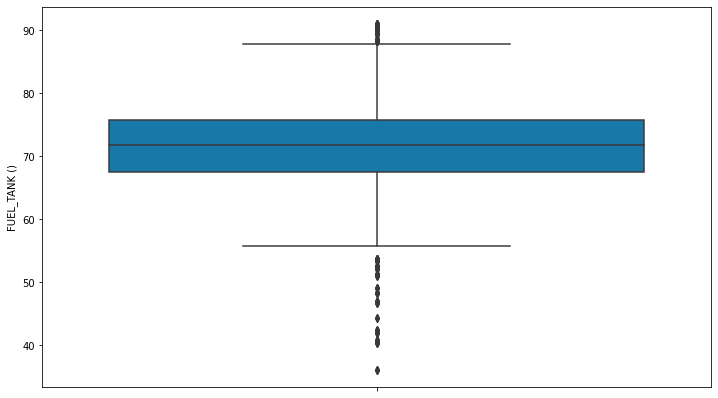

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='FUEL_TANK ()',data=car, palette='winter')

De certa forma, podemos automatizar a análise com o Pandas Profiling

In [28]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# !jupyter nbextension enable --py widgetsnbextension

In [29]:
# from pandas_profiling import ProfileReport
# from pandas_profiling.config import Dataset
# from pandas_profiling.utils.cache import cache_file

In [30]:
# profile = ProfileReport(car, title="Car Trip", explorative=True)
# profile

In [31]:
profile.to_file("profile.html")

NameError: ignored

## 4. Construindo Modelos a partir dos dados

A inteligência artifical é o campo da ciência da computação que provê inteligência humana similar à humana para sistemas baseados em _software_. 

**4.1 Machine Learning**

Fornece às máquinas técnicas para aprender a partir dos dados.

**4.2 Deep Learning**

Uso de redes neurais para a solução de problemas complexos utilizando grande base de dados.


**Regressão Linear**

![img](https://lh4.ggpht.com/_Qmjqb2Gk9no/TDPGMiFaFcI/AAAAAAAAI-A/nHbiCL9VqbI/image_thumb%5B9%5D.png?imgmax=800)

In [32]:
y = car['COOLANT_TEMPERATURE ()']

In [33]:
X = car.filter(['ENGINE_RUN_TINE ()','ENGINE_LOAD ()'], axis = 1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [37]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

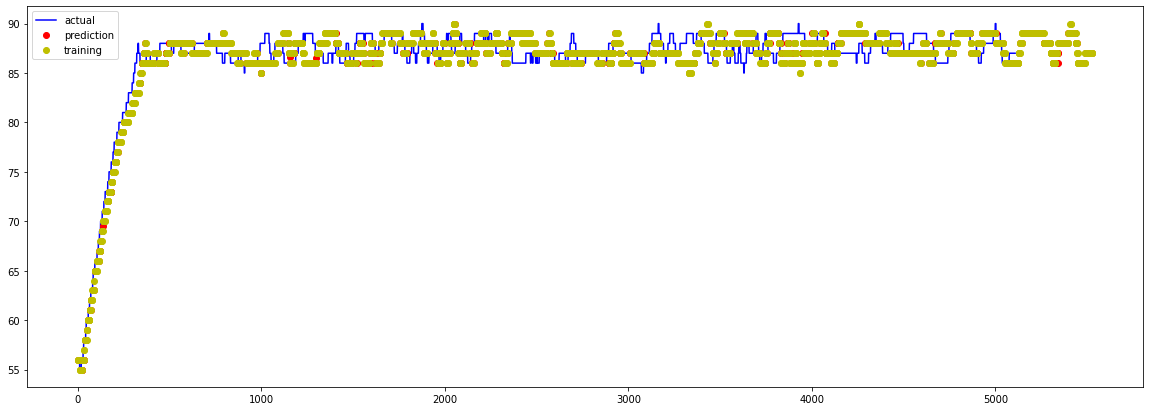

In [39]:
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(20, 7))
plt.plot(range(len(y)), y, 'b-', label = 'actual')
plt.plot(y_test.index, y_pred, 'ro', label = 'prediction')
plt.plot(y_train.index, y_train, 'yo', label = 'training')
plt.legend()

![img2](https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)

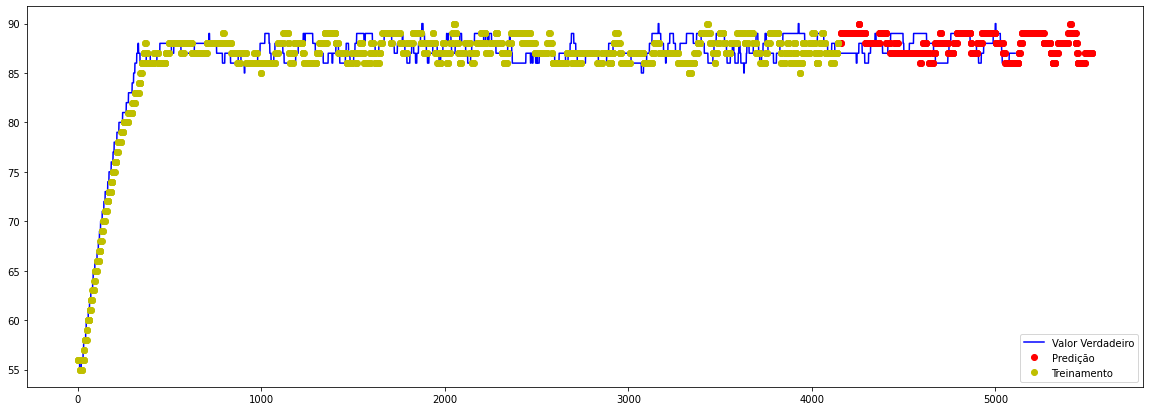

In [42]:
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(20, 7))
plt.plot(range(len(y)), y, 'b-', label = 'Valor Verdadeiro')
plt.plot(y_test.index, y_test, 'ro', label = 'Predição')
plt.plot(y_train.index, y_train, 'yo', label = 'Treinamento')
plt.legend()